In [1]:
import pandas as pd

In [2]:
!pip install geopandas


In [20]:
pd.options.display.max_columns=1000

In [21]:
import geopandas as gpd

In [42]:
data=gpd.read_file("../../20_intermediate_files/30_campuses_w_dist_to_nearest_pp.geojson")

In [43]:
for i in data.columns:
    print(i)

UNIQUEID
NAME
ADDRESS
CITY
STATE
ZIP
ZIP4
TELEPHONE
TYPE
STATUS
POPULATION
COUNTY
COUNTYFIPS
COUNTRY
NAICS_CODE
NAICS_DESC
SOURCE
SOURCEDATE
VAL_METHOD
VAL_DATE
WEBSITE
TOT_ENROLL
TOT_EMP
SHELTERID
preprocessed_name
centroid_x_epsg_102005
centroid_y_epsg_102005
centroid_long
centroid_lat
OPE ID
IPED ID
School Name
Institution Type
# of Nat'l AP Partners
# of Partners
Civic Holiday
MSI
NSLVE
NSLVE
2014
2016 NSLVE Report
2018 NSLVE Reports
2016 Action Plan
2018 Action Plan
2020 Action Plan
Campus Contact
Longitude
Latitude
Pell Grant %
BIPOC %
American Indian or Alaskan Native
Asian
Black or African American
Hispanic or Latinx
NHPI
Two or more Races
SLSV Coalition
ALL IN
AGF
Ask Every Student
Campus Vote Project
Voter Friendly Campus
StudentPIRGs
Aliento Education Fund
Alliance for Youth Organizing
American Democracy Project
 Arizona Students' Association
Baltimore Collegetown Network		
Black Girls Vote
Boston Votes Coalition
California Campus Compact 
CALPIRG Students
CEEP
Civic Nebrask

In [44]:
data

,UNIQUEID,NAME,ADDRESS,CITY,STATE,ZIP,ZIP4,TELEPHONE,TYPE,STATUS,POPULATION,COUNTY,COUNTYFIPS,COUNTRY,NAICS_CODE,NAICS_DESC,SOURCE,SOURCEDATE,VAL_METHOD,VAL_DATE,WEBSITE,TOT_ENROLL,TOT_EMP,SHELTERID,preprocessed_name,centroid_x_epsg_102005,centroid_y_epsg_102005,centroid_long,centroid_lat,OPE ID,IPED ID,School Name,Institution Type,# of Nat'l AP Partners,# of Partners,Civic Holiday,MSI,NSLVE,NSLVE\n2014,2016 NSLVE Report,2018 NSLVE Reports,2016 Action Plan,2018 Action Plan,2020 Action Plan,Campus Contact,Longitude,Latitude,Pell Grant %,BIPOC %,American Indian or Alaskan Native,Asian,Black or African American,Hispanic or Latinx,NHPI,Two or more Races,SLSV Coalition,ALL IN,AGF,Ask Every Student,Campus Vote Project,Voter Friendly Campus,StudentPIRGs,Aliento Education Fund,Alliance for Youth Organizing,American Democracy Project,Arizona Students' Association,Baltimore Collegetown Network\t\t,Black Girls Vote,Boston Votes Coalition,California Campus Compact,CALPIRG Students,CEEP,Civic Nebraska,Common Cause,Count US IN,Creative Campus Voting Project,Day on Democracy,Democracy Works,Engage Miami,Every Vote Counts,Forward Montana,Georgia Shift,Hillel International,IGNITE National,IA & MN Campus Compact,LeadMN,Loud Light,Maine Students Vote,MARYPIRG,MI Familia Vota,Minnesota Youth Collective,Mississippi Votes,NASPAA,New Era Colorado,NYPIRG,NCAAT,NCPIRG,NC Campus Compact,Ohio Campus Compact,PIRGIM Campus Action,Project Pericles,TurnUp Activism,Up to Us/ Net Impact,VoteRiders,Washington Student Association,Xceleader (Vote HBCU),NVEW 2020,NVRD\n2017,NVRD 2018,NVRD 2020,state_2012,Latitude_2012,Longitude_2012,distances_2012,state_2016,Latitude_2016,Longitude_2016,distances_2016,state_2018,Latitude_2018,Longitude_2018,distances_2018,state_2020,Latitude_2020,Longitude_2020,distances_2020,state_2020_early,Latitude_2020_early,Longitude_2020_early,distances_2020_early,2020_early_distance_by_walking (miles),2020_early_duration_by_walking (minutes),2020_early_distance_by_driving (miles),2020_early_duration_by_driving (minutes),2020_early_distance_by_transit (miles),2020_early_duration_by_transit (minutes),Region,2020_distance_by_walking (miles),2020_duration_by_walking (minutes),2020_distance_by_driving (miles),2020_duration_by_driving (minutes),2020_distance_by_transit (miles),2020_duration_by_transit (minutes),geometry
0,110361,CALIFORNIA BAPTIST UNIVERSITY,8432 MAGNOLIA AVE,Riverside,CA,92504,3297,(877) 228-3615,2,A,12142.0,RIVERSIDE,06065,USA,611310,"COLLEGES, UNIVERSITIES, AND PROFESSIONAL SCHOOLS",https://calbaptist.edu/map,2018-05-10,IMAGERY/OTHER,2019-01-24,www.calbaptist.edu,10486.0,1656.0,NOT AVAILABLE,californiabaptistuniversity,-1.960011e+06,-3.315572e+05,-117.426029,33.927877,1125.00,110361.00,California Baptist University,"Private, 4 Year",0.0,1.0,0.0,HSI,No,None,None,None,None,None,None,None,-117.425619,33.929321,46,55.51%,0.57%,5.36%,8.65%,34.58%,0.93%,5.42%,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,X,,,,,,,,,,,,,,,,,,CA,33.98549,-117.51472,9926.173405,CA,33.99504,-117.373184,8358.964935,CA,33.99504,-117.373184,8358.964935,CA,33.928756,-117.440286,807.817134,CA,33.928756,-117.440286,807.795184,1.180605,23,1.180605,5,1.180605,17,West,1.180605,23,1.180605,5,1.180605,17,"POLYGON ((-1960482.34532 -331343.27832, -19600..."
1,113698,DOMINICAN UNIVERSITY OF CALIFORNIA,50 ACACIA AVE,San Rafael,CA,94901,2298,(415) 457-4440,2,A,2395.0,MARIN,06041,USA,611310,"COLLEGES, UNIVERSITIES, AND PROFESSIONAL SCHOOLS",https://www.dominican.edu/about/campus/mapsand...,2018-08-30,IMAGERY/OTHER,2019-01-24,www.dominican.edu,1779.0,616.0,NOT AVAILABLE,dominicanuniversitycalifornia,-2.284703e+06,2.212290e+05,-122.514107,37.980091,1196.00,113698.00,Dominican University of California,"Private, 4 Year",1.0,2.0,3.0,,Yes,None,http://www.allinchallenge.org/wp-content/uploa...,https://www.allinchallenge.org/wp-content/uplo...,http://www.allinchallenge.org/wp-content/uploa...,None,None,None,-122.512051,37.981279,30,52.96%,0.57%,22.26%,4.43%,18.55%,1.08%,6.08%,,X,,,,,,,,

In [45]:
data['MSI'].value_counts()

                      1608
HSI                    276
HBCU                    84
AANAPISI & HSI          68
PBI                     66
AANAPISI                45
NASNTI                  17
TCU                     15
AANAPISI & ANNH         14
ANNH & NASNTI            8
HSI & PBI                6
ANNH & TCU               4
ANNH                     2
AANAPISI & PBI           2
ANNH, HSI & NASNTI       1
Name: MSI, dtype: int64

In [46]:
len(data[['STATE','distances_2020_early']]['STATE'].unique())

58

In [47]:
data.loc[(data['MSI'] =='HBCU') | (data['MSI']=='PBI'), 'MSI'] = 'HBCU_PBI'
data.loc[(data['MSI']==" "),'MSI']= 'PWI'
data.loc[(data['MSI']=="AANAPISI & HSI"),'MSI']= 'HSI'



In [48]:
data.loc[(data['MSI']!='HBCU_PBI') & (data['MSI']!='PWI') & (data['MSI']!='HSI') ,'MSI']= 'Misc'

In [49]:
data['MSI'].value_counts()

PWI         1608
HSI          344
HBCU_PBI     150
Misc         115
Name: MSI, dtype: int64

In [52]:
data

,UNIQUEID,NAME,ADDRESS,CITY,STATE,ZIP,ZIP4,TELEPHONE,TYPE,STATUS,POPULATION,COUNTY,COUNTYFIPS,COUNTRY,NAICS_CODE,NAICS_DESC,SOURCE,SOURCEDATE,VAL_METHOD,VAL_DATE,WEBSITE,TOT_ENROLL,TOT_EMP,SHELTERID,preprocessed_name,centroid_x_epsg_102005,centroid_y_epsg_102005,centroid_long,centroid_lat,OPE ID,IPED ID,School Name,Institution Type,# of Nat'l AP Partners,# of Partners,Civic Holiday,MSI,NSLVE,NSLVE\n2014,2016 NSLVE Report,2018 NSLVE Reports,2016 Action Plan,2018 Action Plan,2020 Action Plan,Campus Contact,Longitude,Latitude,Pell Grant %,BIPOC %,American Indian or Alaskan Native,Asian,Black or African American,Hispanic or Latinx,NHPI,Two or more Races,SLSV Coalition,ALL IN,AGF,Ask Every Student,Campus Vote Project,Voter Friendly Campus,StudentPIRGs,Aliento Education Fund,Alliance for Youth Organizing,American Democracy Project,Arizona Students' Association,Baltimore Collegetown Network\t\t,Black Girls Vote,Boston Votes Coalition,California Campus Compact,CALPIRG Students,CEEP,Civic Nebraska,Common Cause,Count US IN,Creative Campus Voting Project,Day on Democracy,Democracy Works,Engage Miami,Every Vote Counts,Forward Montana,Georgia Shift,Hillel International,IGNITE National,IA & MN Campus Compact,LeadMN,Loud Light,Maine Students Vote,MARYPIRG,MI Familia Vota,Minnesota Youth Collective,Mississippi Votes,NASPAA,New Era Colorado,NYPIRG,NCAAT,NCPIRG,NC Campus Compact,Ohio Campus Compact,PIRGIM Campus Action,Project Pericles,TurnUp Activism,Up to Us/ Net Impact,VoteRiders,Washington Student Association,Xceleader (Vote HBCU),NVEW 2020,NVRD\n2017,NVRD 2018,NVRD 2020,state_2012,Latitude_2012,Longitude_2012,distances_2012,state_2016,Latitude_2016,Longitude_2016,distances_2016,state_2018,Latitude_2018,Longitude_2018,distances_2018,state_2020,Latitude_2020,Longitude_2020,distances_2020,state_2020_early,Latitude_2020_early,Longitude_2020_early,distances_2020_early,2020_early_distance_by_walking (miles),2020_early_duration_by_walking (minutes),2020_early_distance_by_driving (miles),2020_early_duration_by_driving (minutes),2020_early_distance_by_transit (miles),2020_early_duration_by_transit (minutes),Region,2020_distance_by_walking (miles),2020_duration_by_walking (minutes),2020_distance_by_driving (miles),2020_duration_by_driving (minutes),2020_distance_by_transit (miles),2020_duration_by_transit (minutes),geometry
0,110361,CALIFORNIA BAPTIST UNIVERSITY,8432 MAGNOLIA AVE,Riverside,CA,92504,3297,(877) 228-3615,2,A,12142.0,RIVERSIDE,06065,USA,611310,"COLLEGES, UNIVERSITIES, AND PROFESSIONAL SCHOOLS",https://calbaptist.edu/map,2018-05-10,IMAGERY/OTHER,2019-01-24,www.calbaptist.edu,10486.0,1656.0,NOT AVAILABLE,californiabaptistuniversity,-1.960011e+06,-3.315572e+05,-117.426029,33.927877,1125.00,110361.00,California Baptist University,"Private, 4 Year",0.0,1.0,0.0,HSI,No,None,None,None,None,None,None,None,-117.425619,33.929321,46,55.51%,0.57%,5.36%,8.65%,34.58%,0.93%,5.42%,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,X,,,,,,,,,,,,,,,,,,CA,33.98549,-117.51472,9926.173405,CA,33.99504,-117.373184,8358.964935,CA,33.99504,-117.373184,8358.964935,CA,33.928756,-117.440286,807.817134,CA,33.928756,-117.440286,807.795184,1.180605,23,1.180605,5,1.180605,17,West,1.180605,23,1.180605,5,1.180605,17,"POLYGON ((-1960482.34532 -331343.27832, -19600..."
1,113698,DOMINICAN UNIVERSITY OF CALIFORNIA,50 ACACIA AVE,San Rafael,CA,94901,2298,(415) 457-4440,2,A,2395.0,MARIN,06041,USA,611310,"COLLEGES, UNIVERSITIES, AND PROFESSIONAL SCHOOLS",https://www.dominican.edu/about/campus/mapsand...,2018-08-30,IMAGERY/OTHER,2019-01-24,www.dominican.edu,1779.0,616.0,NOT AVAILABLE,dominicanuniversitycalifornia,-2.284703e+06,2.212290e+05,-122.514107,37.980091,1196.00,113698.00,Dominican University of California,"Private, 4 Year",1.0,2.0,3.0,PWI,Yes,None,http://www.allinchallenge.org/wp-content/uploa...,https://www.allinchallenge.org/wp-content/uplo...,http://www.allinchallenge.org/wp-content/uploa...,None,None,None,-122.512051,37.981279,30,52.96%,0.57%,22.26%,4.43%,18.55%,1.08%,6.08%,,X,,,,,

# Early Voting

In [50]:
data['distances_2020_early'].value_counts(dropna=False)

NaN             270
0.000000        186
807.795184        1
2419.718985       1
2354.593098       1
               ... 
1527.869900       1
2532.412356       1
10473.117185      1
3954.750582       1
1642.481309       1
Name: distances_2020_early, Length: 1763, dtype: int64

In [58]:
data[~data['2020_early_distance_by_walking (miles)'].isna()]

,UNIQUEID,NAME,ADDRESS,CITY,STATE,ZIP,ZIP4,TELEPHONE,TYPE,STATUS,POPULATION,COUNTY,COUNTYFIPS,COUNTRY,NAICS_CODE,NAICS_DESC,SOURCE,SOURCEDATE,VAL_METHOD,VAL_DATE,WEBSITE,TOT_ENROLL,TOT_EMP,SHELTERID,preprocessed_name,centroid_x_epsg_102005,centroid_y_epsg_102005,centroid_long,centroid_lat,OPE ID,IPED ID,School Name,Institution Type,# of Nat'l AP Partners,# of Partners,Civic Holiday,MSI,NSLVE,NSLVE\n2014,2016 NSLVE Report,2018 NSLVE Reports,2016 Action Plan,2018 Action Plan,2020 Action Plan,Campus Contact,Longitude,Latitude,Pell Grant %,BIPOC %,American Indian or Alaskan Native,Asian,Black or African American,Hispanic or Latinx,NHPI,Two or more Races,SLSV Coalition,ALL IN,AGF,Ask Every Student,Campus Vote Project,Voter Friendly Campus,StudentPIRGs,Aliento Education Fund,Alliance for Youth Organizing,American Democracy Project,Arizona Students' Association,Baltimore Collegetown Network\t\t,Black Girls Vote,Boston Votes Coalition,California Campus Compact,CALPIRG Students,CEEP,Civic Nebraska,Common Cause,Count US IN,Creative Campus Voting Project,Day on Democracy,Democracy Works,Engage Miami,Every Vote Counts,Forward Montana,Georgia Shift,Hillel International,IGNITE National,IA & MN Campus Compact,LeadMN,Loud Light,Maine Students Vote,MARYPIRG,MI Familia Vota,Minnesota Youth Collective,Mississippi Votes,NASPAA,New Era Colorado,NYPIRG,NCAAT,NCPIRG,NC Campus Compact,Ohio Campus Compact,PIRGIM Campus Action,Project Pericles,TurnUp Activism,Up to Us/ Net Impact,VoteRiders,Washington Student Association,Xceleader (Vote HBCU),NVEW 2020,NVRD\n2017,NVRD 2018,NVRD 2020,state_2012,Latitude_2012,Longitude_2012,distances_2012,state_2016,Latitude_2016,Longitude_2016,distances_2016,state_2018,Latitude_2018,Longitude_2018,distances_2018,state_2020,Latitude_2020,Longitude_2020,distances_2020,state_2020_early,Latitude_2020_early,Longitude_2020_early,distances_2020_early,2020_early_distance_by_walking (miles),2020_early_duration_by_walking (minutes),2020_early_distance_by_driving (miles),2020_early_duration_by_driving (minutes),2020_early_distance_by_transit (miles),2020_early_duration_by_transit (minutes),Region,2020_distance_by_walking (miles),2020_duration_by_walking (minutes),2020_distance_by_driving (miles),2020_duration_by_driving (minutes),2020_distance_by_transit (miles),2020_duration_by_transit (minutes),geometry
0,110361,CALIFORNIA BAPTIST UNIVERSITY,8432 MAGNOLIA AVE,Riverside,CA,92504,3297,(877) 228-3615,2,A,12142.0,RIVERSIDE,06065,USA,611310,"COLLEGES, UNIVERSITIES, AND PROFESSIONAL SCHOOLS",https://calbaptist.edu/map,2018-05-10,IMAGERY/OTHER,2019-01-24,www.calbaptist.edu,10486.0,1656.0,NOT AVAILABLE,californiabaptistuniversity,-1.960011e+06,-3.315572e+05,-117.426029,33.927877,1125.00,110361.00,California Baptist University,"Private, 4 Year",0.0,1.0,0.0,HSI,No,None,None,None,None,None,None,None,-117.425619,33.929321,46,55.51%,0.57%,5.36%,8.65%,34.58%,0.93%,5.42%,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,X,,,,,,,,,,,,,,,,,,CA,33.98549,-117.51472,9926.173405,CA,33.99504,-117.373184,8358.964935,CA,33.99504,-117.373184,8358.964935,CA,33.928756,-117.440286,807.817134,CA,33.928756,-117.440286,807.795184,1.180605,23,1.180605,5,1.180605,17,West,1.180605,23,1.180605,5,1.180605,17,"POLYGON ((-1960482.34532 -331343.27832, -19600..."
1,113698,DOMINICAN UNIVERSITY OF CALIFORNIA,50 ACACIA AVE,San Rafael,CA,94901,2298,(415) 457-4440,2,A,2395.0,MARIN,06041,USA,611310,"COLLEGES, UNIVERSITIES, AND PROFESSIONAL SCHOOLS",https://www.dominican.edu/about/campus/mapsand...,2018-08-30,IMAGERY/OTHER,2019-01-24,www.dominican.edu,1779.0,616.0,NOT AVAILABLE,dominicanuniversitycalifornia,-2.284703e+06,2.212290e+05,-122.514107,37.980091,1196.00,113698.00,Dominican University of California,"Private, 4 Year",1.0,2.0,3.0,PWI,Yes,None,http://www.allinchallenge.org/wp-content/uploa...,https://www.allinchallenge.org/wp-content/uplo...,http://www.allinchallenge.org/wp-content/uploa...,None,None,None,-122.512051,37.981279,30,52.96%,0.57%,22.26%,4.43%,18.55%,1.08%,6.08%,,X,,,,,

In [57]:
import numpy as np
data[data['2020_early_distance_by_walking (miles)'].isna()]['STATE'].value_counts()

PR    42
NJ     5
GU     3
MN     1
AS     1
MP     1
FM     1
PW     1
VI     1
Name: STATE, dtype: int64

In [14]:
data['distances_2020_early']=data['distances_2020_early']/1609

In [15]:
data['distances_2020_early'].value_counts()

0.000000    186
0.502048      1
0.470299      1
2.250137      1
0.827659      1
           ... 
1.573905      1
6.509085      1
2.457893      1
0.158184      1
1.020809      1
Name: distances_2020_early, Length: 1763, dtype: int64

In [16]:
#Droppings 272 rows (NA)

In [17]:
data_early=data.dropna(subset=['distances_2020_early'])

In [18]:
len(data_early[['STATE','distances_2020_early']]['STATE'].unique())

45

In [21]:
#states that are removed due to null/missing values
set(data[['STATE','distances_2020_early']]['STATE'].unique())-set(data_early[['STATE','distances_2020_early']]['STATE'].unique())

{'AS',
 'CT',
 'DE',
 'FM',
 'GU',
 'MO',
 'MP',
 'MS',
 'NJ',
 'NJ ',
 'OH ',
 'OR',
 'PR',
 'PW',
 'VI'}

In [18]:
import matplotlib.pyplot as plt

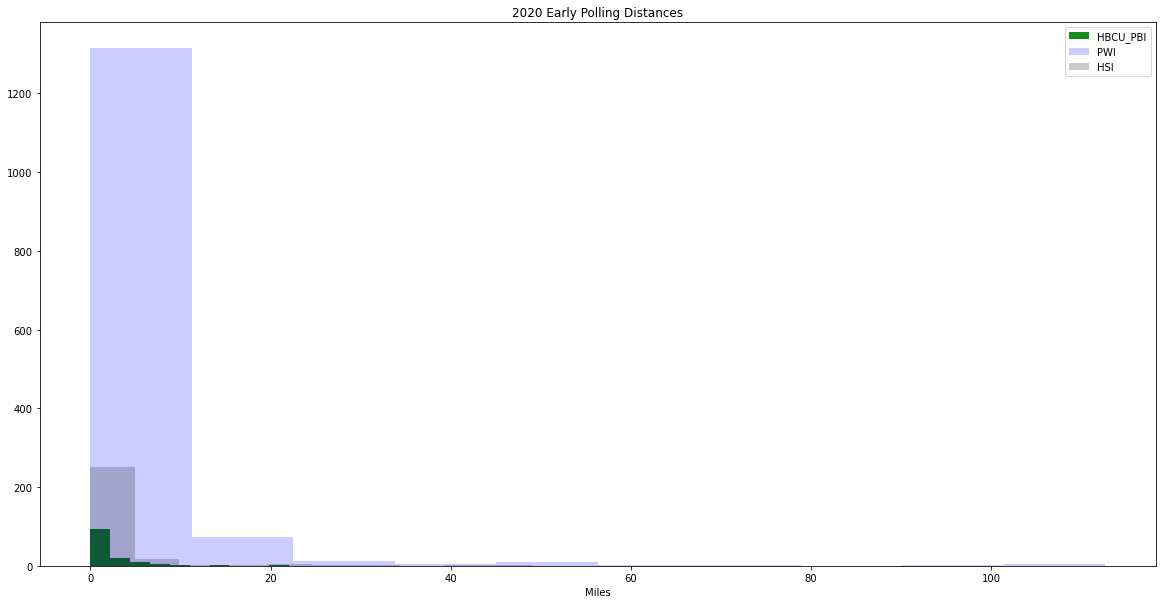

In [19]:
plt.figure(figsize=(20,10))
plt.hist(data_early.query('MSI == "HBCU_PBI"')['distances_2020_early'],color='green',alpha=0.9,label='HBCU_PBI', bins=10)
plt.hist(data_early.query('MSI == "PWI"')['distances_2020_early'],color='blue',alpha=0.2, label='PWI',bins=10)
plt.hist(data_early.query('MSI == "HSI"')['distances_2020_early'],color='black',alpha=0.2, label='HSI',bins=10)
plt.title("2020 Early Polling Distances")
plt.xlabel("Miles")
plt.legend()
plt.show()




In [20]:
data_early.query('MSI == "PWI"')['distances_2020_early'].describe()

count    1427.000000
mean        3.993182
std         9.908791
min         0.000000
25%         0.492264
50%         1.333679
75%         3.288492
max       112.603767
Name: distances_2020_early, dtype: float64

In [21]:
data_early.query('MSI == "PWI"')['distances_2020_early'].value_counts(normalize=True)*100

0.000000    5.956552
0.494360    0.070077
0.032765    0.070077
0.911058    0.070077
5.168549    0.070077
              ...   
3.034703    0.070077
1.860424    0.070077
0.907442    0.070077
1.102142    0.070077
1.020809    0.070077
Name: distances_2020_early, Length: 1343, dtype: float64

### ~6% of PWI have on campus early voting sites

In [22]:
100*len(data_early.query('MSI == "PWI"')['distances_2020_early'][data_early.query('MSI == "PWI"')['distances_2020_early']<5])/len(data_early.query('MSI == "PWI"'))

82.55080588647512

### ~83% of PWI have early voting sites either on campus or atleast 5 miles from the campus

-----------------------------------------

In [23]:
data_early.query('MSI == "HBCU_PBI"')['distances_2020_early'].describe()

count    133.000000
mean       2.080133
std        2.892938
min        0.000000
25%        0.390826
50%        1.099075
75%        2.679979
max       22.031545
Name: distances_2020_early, dtype: float64

In [24]:
data_early.query('MSI == "HBCU_PBI"')['distances_2020_early'].value_counts(normalize=True)*100

0.000000    9.774436
0.052574    0.751880
8.801802    0.751880
0.031426    0.751880
1.573564    0.751880
              ...   
1.354012    0.751880
0.626859    0.751880
0.693635    0.751880
2.410975    0.751880
0.143904    0.751880
Name: distances_2020_early, Length: 121, dtype: float64

### ~10% of HBCU/PBI have on campus early voting sites

In [25]:
100*len(data_early.query('MSI == "HBCU_PBI"')['distances_2020_early'][data_early.query('MSI == "HBCU_PBI"')['distances_2020_early']<5])/len(data_early.query('MSI == "HBCU_PBI"'))

88.7218045112782

### ~88.72% of HBCU/PBI have early voting sites either on campus or within 5 miles from Campus

---------------------

In [26]:
data_early.query('MSI == "HSI"')['distances_2020_early'].describe()

count    283.000000
mean       2.489474
std        6.144308
min        0.000000
25%        0.000000
50%        0.707473
75%        1.887948
max       49.119608
Name: distances_2020_early, dtype: float64

In [27]:
data_early.query('MSI == "HSI"')['distances_2020_early'].value_counts(normalize=True)*100

0.000000    27.561837
0.502048     0.353357
0.423942     0.353357
0.509561     0.353357
0.729091     0.353357
              ...    
0.894003     0.353357
1.491473     0.353357
1.824682     0.353357
0.516581     0.353357
0.713442     0.353357
Name: distances_2020_early, Length: 206, dtype: float64

### ~28% of HSI have on campus early voting sites

In [28]:
100*len(data_early.query('MSI == "HSI"')['distances_2020_early'][data_early.query('MSI == "HSI"')['distances_2020_early']<5])/len(data_early.query('MSI == "HSI"'))

88.69257950530036

### ~88.72% of HSI have early voting sites either on campus or within 5 miles from Campus

--------

In [29]:
data_early.query('MSI == "Misc"')['distances_2020_early'].describe()

count    105.000000
mean       7.022026
std       15.826392
min        0.000000
25%        0.548532
50%        1.253198
75%        3.439083
max      111.272944
Name: distances_2020_early, dtype: float64

In [30]:
data_early.query('MSI == "Misc"')['distances_2020_early'].value_counts(normalize=True)*100

0.000000     9.523810
53.338140    0.952381
1.767773     0.952381
46.049840    0.952381
55.421305    0.952381
               ...   
7.507629     0.952381
0.876779     0.952381
0.948993     0.952381
3.322668     0.952381
6.161558     0.952381
Name: distances_2020_early, Length: 96, dtype: float64

### ~10% of Misc have on campus early voting sites

In [31]:
100*len(data_early.query('MSI == "Misc"')['distances_2020_early'][data_early.query('MSI == "Misc"')['distances_2020_early']<5])/len(data_early.query('MSI == "Misc"'))

77.14285714285714

### ~77.14% of Misc have early voting sites either on campus or within 5 miles from Campus

------------

## Polling Place General

In [34]:
data['distances_2020'].value_counts(dropna=False)

NaN            572
0.000000       399
807.817134       1
769.312419       1
337.307767       1
              ... 
37.993328        1
52.784955        1
4833.507993      1
542.164249       1
820.905570       1
Name: distances_2020, Length: 1251, dtype: int64

In [36]:
data['distances_2020']=data['distances_2020']/1609

In [37]:
data_2020=data.dropna(subset=['distances_2020'])

In [38]:
data_2020.query('MSI == "PWI"')['distances_2020'].describe()

count    1210.000000
mean        0.568085
std         1.000558
min         0.000000
25%         0.028569
50%         0.241901
75%         0.693740
max        17.590581
Name: distances_2020, dtype: float64

In [39]:
data_2020.query('MSI == "PWI"')['distances_2020'].value_counts(normalize=True)*100

0.000000    20.495868
0.492641     0.082645
0.582607     0.082645
0.806514     0.082645
0.009141     0.082645
              ...    
0.443997     0.082645
0.181109     0.082645
0.318437     0.082645
0.287457     0.082645
0.510196     0.082645
Name: distances_2020, Length: 963, dtype: float64

### ~20% of PWI have polling locations on campus

In [40]:
100*len(data_2020.query('MSI == "PWI"')['distances_2020'][data_2020.query('MSI == "PWI"')['distances_2020']<5])/len(data_2020.query('MSI == "PWI"'))

99.33884297520662

### ~99% of PWI have polling locations within 5 miles from Campus

---------------

In [42]:
data_2020.query('MSI == "HBCU_PBI"')['distances_2020'].describe()

count    125.000000
mean       0.365705
std        0.533995
min        0.000000
25%        0.000000
50%        0.189682
75%        0.487041
max        3.037870
Name: distances_2020, dtype: float64

In [46]:
data_2020.query('MSI == "HBCU_PBI"')['distances_2020'].value_counts(normalize=True)*100

0.000000    29.6
0.608184     0.8
0.020367     0.8
0.103995     0.8
0.153069     0.8
            ... 
0.491716     0.8
0.220470     0.8
0.609102     0.8
0.331862     0.8
0.589911     0.8
Name: distances_2020, Length: 89, dtype: float64

### ~30% of HBCU/PBI have polling locations on campus

In [47]:
100*len(data_2020.query('MSI == "HBCU_PBI"')['distances_2020'][data_2020.query('MSI == "HBCU_PBI"')['distances_2020']<5])/len(data_2020.query('MSI == "HBCU_PBI"'))

100.0

### 100% of HBCU/PBI have polling locations within 5 miles from campus

---------------------

In [48]:
data_2020.query('MSI == "HSI"')['distances_2020'].describe()

count    242.000000
mean       0.430922
std        0.803183
min        0.000000
25%        0.000000
50%        0.088428
75%        0.524082
max        7.317574
Name: distances_2020, dtype: float64

In [50]:
data_2020.query('MSI == "HSI"')['distances_2020'].value_counts(normalize=True)*100

0.000000    41.735537
0.502062     0.413223
1.020529     0.413223
0.329470     0.413223
1.328597     0.413223
              ...    
0.787733     0.413223
0.286452     0.413223
0.418892     0.413223
0.438577     0.413223
0.713224     0.413223
Name: distances_2020, Length: 142, dtype: float64

### ~42% of HSI have polling locations on campus

In [51]:
100*len(data_2020.query('MSI == "HSI"')['distances_2020'][data_2020.query('MSI == "HSI"')['distances_2020']<5])/len(data_2020.query('MSI == "HSI"'))

99.17355371900827

### 99% of HSI have polling locations within 5 miles from campus

---------------------

In [52]:
data_2020.query('MSI == "Misc"')['distances_2020'].describe()

count    71.000000
mean      0.567584
std       0.952227
min       0.000000
25%       0.051668
50%       0.282393
75%       0.667691
max       6.352578
Name: distances_2020, dtype: float64

In [56]:
data_2020.query('MSI == "Misc"')['distances_2020'].value_counts(normalize=True).head(5)*100

0.000000    18.309859
0.654353     1.408451
0.143809     1.408451
0.681030     1.408451
0.281788     1.408451
Name: distances_2020, dtype: float64

### 18% of Misc Colleges have on campus polling places

In [57]:
100*len(data_2020.query('MSI == "Misc"')['distances_2020'][data_2020.query('MSI == "Misc"')['distances_2020']<5])/len(data_2020.query('MSI == "Misc"'))

98.59154929577464

### ~99% of Misc have polling locations within 5 miles from campus